**Creating and solving model**

$$
\begin{array}{rll}
\text{Max} & Z = 27x_1 + 21x_2 - (10x_1 + 9x_2) - (14x_1 + 10x_2)\\
\text{s.a.} & x_1 + x_2 \le 80 \\
& 2x_1 + x_2 \le 100 \\
& x_1 \le 40\\[10pt]
& x_1, x_2 \ge 0 
\end{array}
$$

**Step 1: Import functions from the docplex module**

In [1]:
from docplex.mp.model import Model

**Step 2: Create empty model**

In [2]:
mdl = Model("modelo")

**Step 3: Create activity variables**

In [3]:
x1=mdl.continuous_var(name="x_1")
x2=mdl.continuous_var(name="x_2")

**Step 4: Set objective function**

In [4]:
mdl.maximize(27*x1 + 21*x2 - 10*x1 - 9*x2 - 14*x1 - 10*x2)

**Step 6: Add constraints**

In [5]:
mdl.add_constraint(x1+x2<=80)
mdl.add_constraint(2*x1+x2<=100)
mdl.add_constraint(x1<=40)

docplex.mp.LinearConstraint[](x_1,LE,40)

**Step 7: Print model**

In [6]:
print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: modelo

Maximize
 obj: 3 x_1 + 2 x_2
Subject To
 c1: x_1 + x_2 <= 80
 c2: 2 x_1 + x_2 <= 100
 c3: x_1 <= 40

Bounds
End



**Step 7: Solve model**

In [7]:
solucion = mdl.solve(log_output =True)

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 0 columns.
Reduced LP has 2 rows, 2 columns, and 4 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual infeasibility =             0.000000
Iteration:     2   Dual objective     =           180.000000


In [8]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

**Step 8: Print variable values for optimal solution**

In [9]:
solucion.display()

solution for: modelo
objective: 180.000
x_1 = 20.000
x_2 = 60.000


**Step 9: Graphic Model with the F.O Optimized**

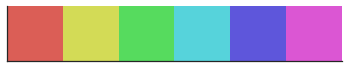

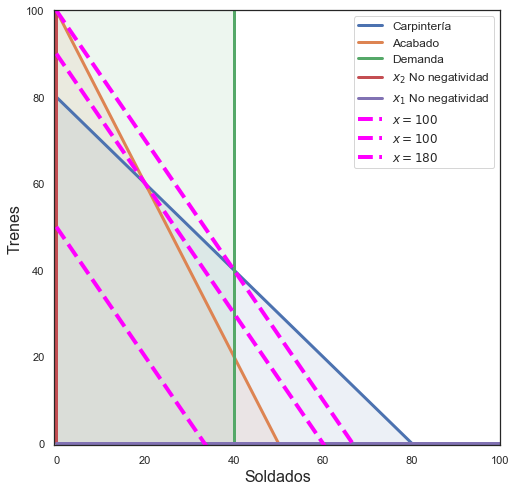

In [23]:
import numpy as np #librería numérica de python
from matplotlib import pyplot as plt#librería para graficar
from matplotlib.path import Path 
from matplotlib.patches import PathPatch #diseño
import seaborn as sns #colores para el gráfico

colores=sns.palplot(sns.color_palette("hls",))
sns.set()
sns.set(style="white")
sns.despine()
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(8,8))
x1 = np.linspace(0,100)

plt.plot(x1, 80-x1, lw=3, label="Carpintería")
plt.fill_between(x1, 0, 80-x1, alpha=0.1)

plt.plot(x1, 100 - 2*x1, lw=3, label="Acabado")
plt.fill_between(x1, 0, 100 - 2*x1, alpha=0.1)

plt.plot(40*np.ones_like(x1), x1, lw=3, label="Demanda")
plt.fill_betweenx(x1, 0, 40, alpha=0.1)

plt.plot(np.zeros_like(x1), x1, lw=3, label="$x_2$ No negatividad")
plt.plot(x1, np.zeros_like(x1), lw=3, label="$x_1$ No negatividad")

plt.plot(x1, 50-(3/2)*x1, color="magenta", linestyle="dashed",lw=4, label="$x=100$") #F.O sin ser máx.
plt.plot(x1, 100-(3/2)*x1, color="magenta", linestyle="dashed",lw=4, label="$x=100$") #F.O no region factible
plt.plot(x1, 90-(3/2)*x1, color="magenta", linestyle="dashed",lw=4, label="$x=180$") #F.O óptimo

plt.xlabel("Soldados", fontsize=16)
plt.ylabel("Trenes", fontsize=16)
plt.xlim(-0.5,100)
plt.ylim(-0.5,100)
plt.legend(fontsize=12)
plt.show()